# Wine Quality prediction

libraries required for analysing the data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

read the data set 

In [2]:
df=pd.read_csv('wine.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Understanding and analysing the data 

In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

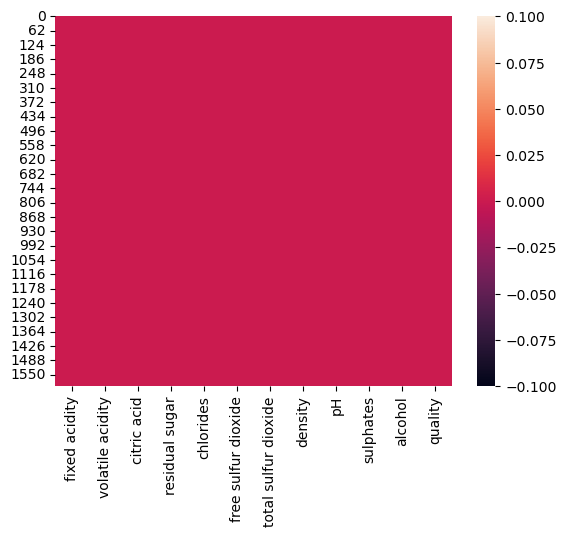

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


there is no negative values , no missing values , median < mean ->right skewed, presence of outliers becuase of huge difference in 75% and max.

In [8]:
df.nunique().to_frame(" unqiue no.")

,unqiue no.
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [9]:
print(df['quality'].unique())

[5 6 7 4 8 3]


# Data Visualization

<Axes: >

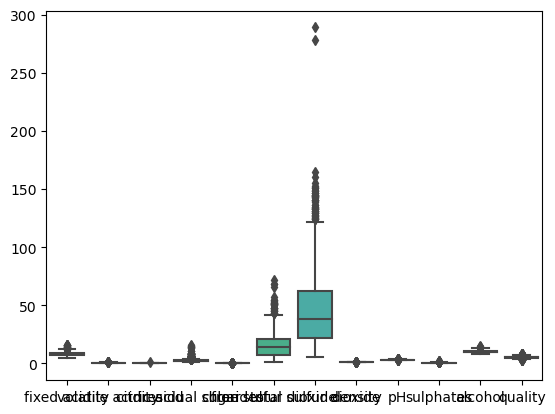

In [10]:
sns.boxplot(df)

<Axes: >

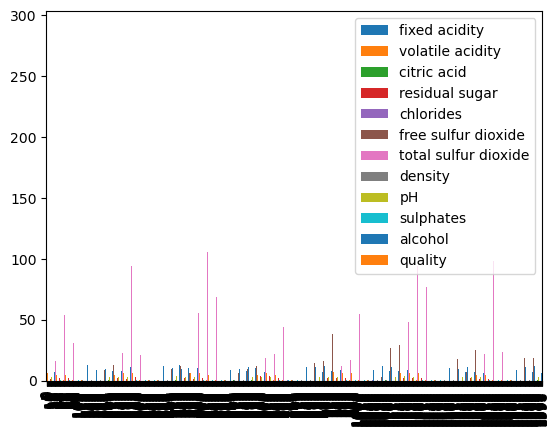

In [11]:
df.plot(kind='bar')

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


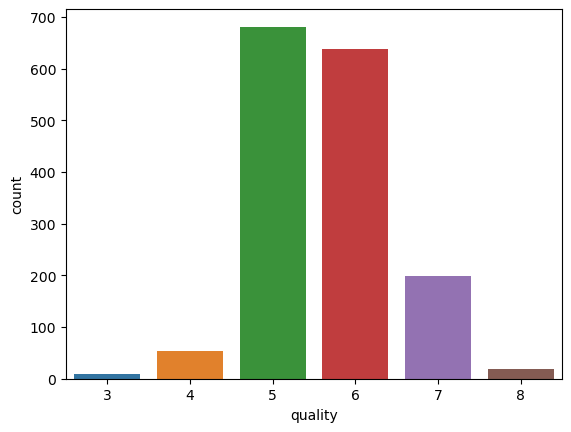

In [12]:
sns.countplot(x='quality', data=df)
print(df['quality'].value_counts())

In [13]:
# plt.figure(figsize=(10,6))
# sns.barplot(x='free sulfur dioxide',y='quality',data=df)

<Axes: >

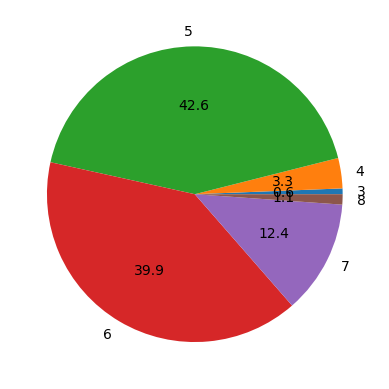

In [14]:
df.groupby('quality').size().plot(kind='pie',autopct='%.1f')

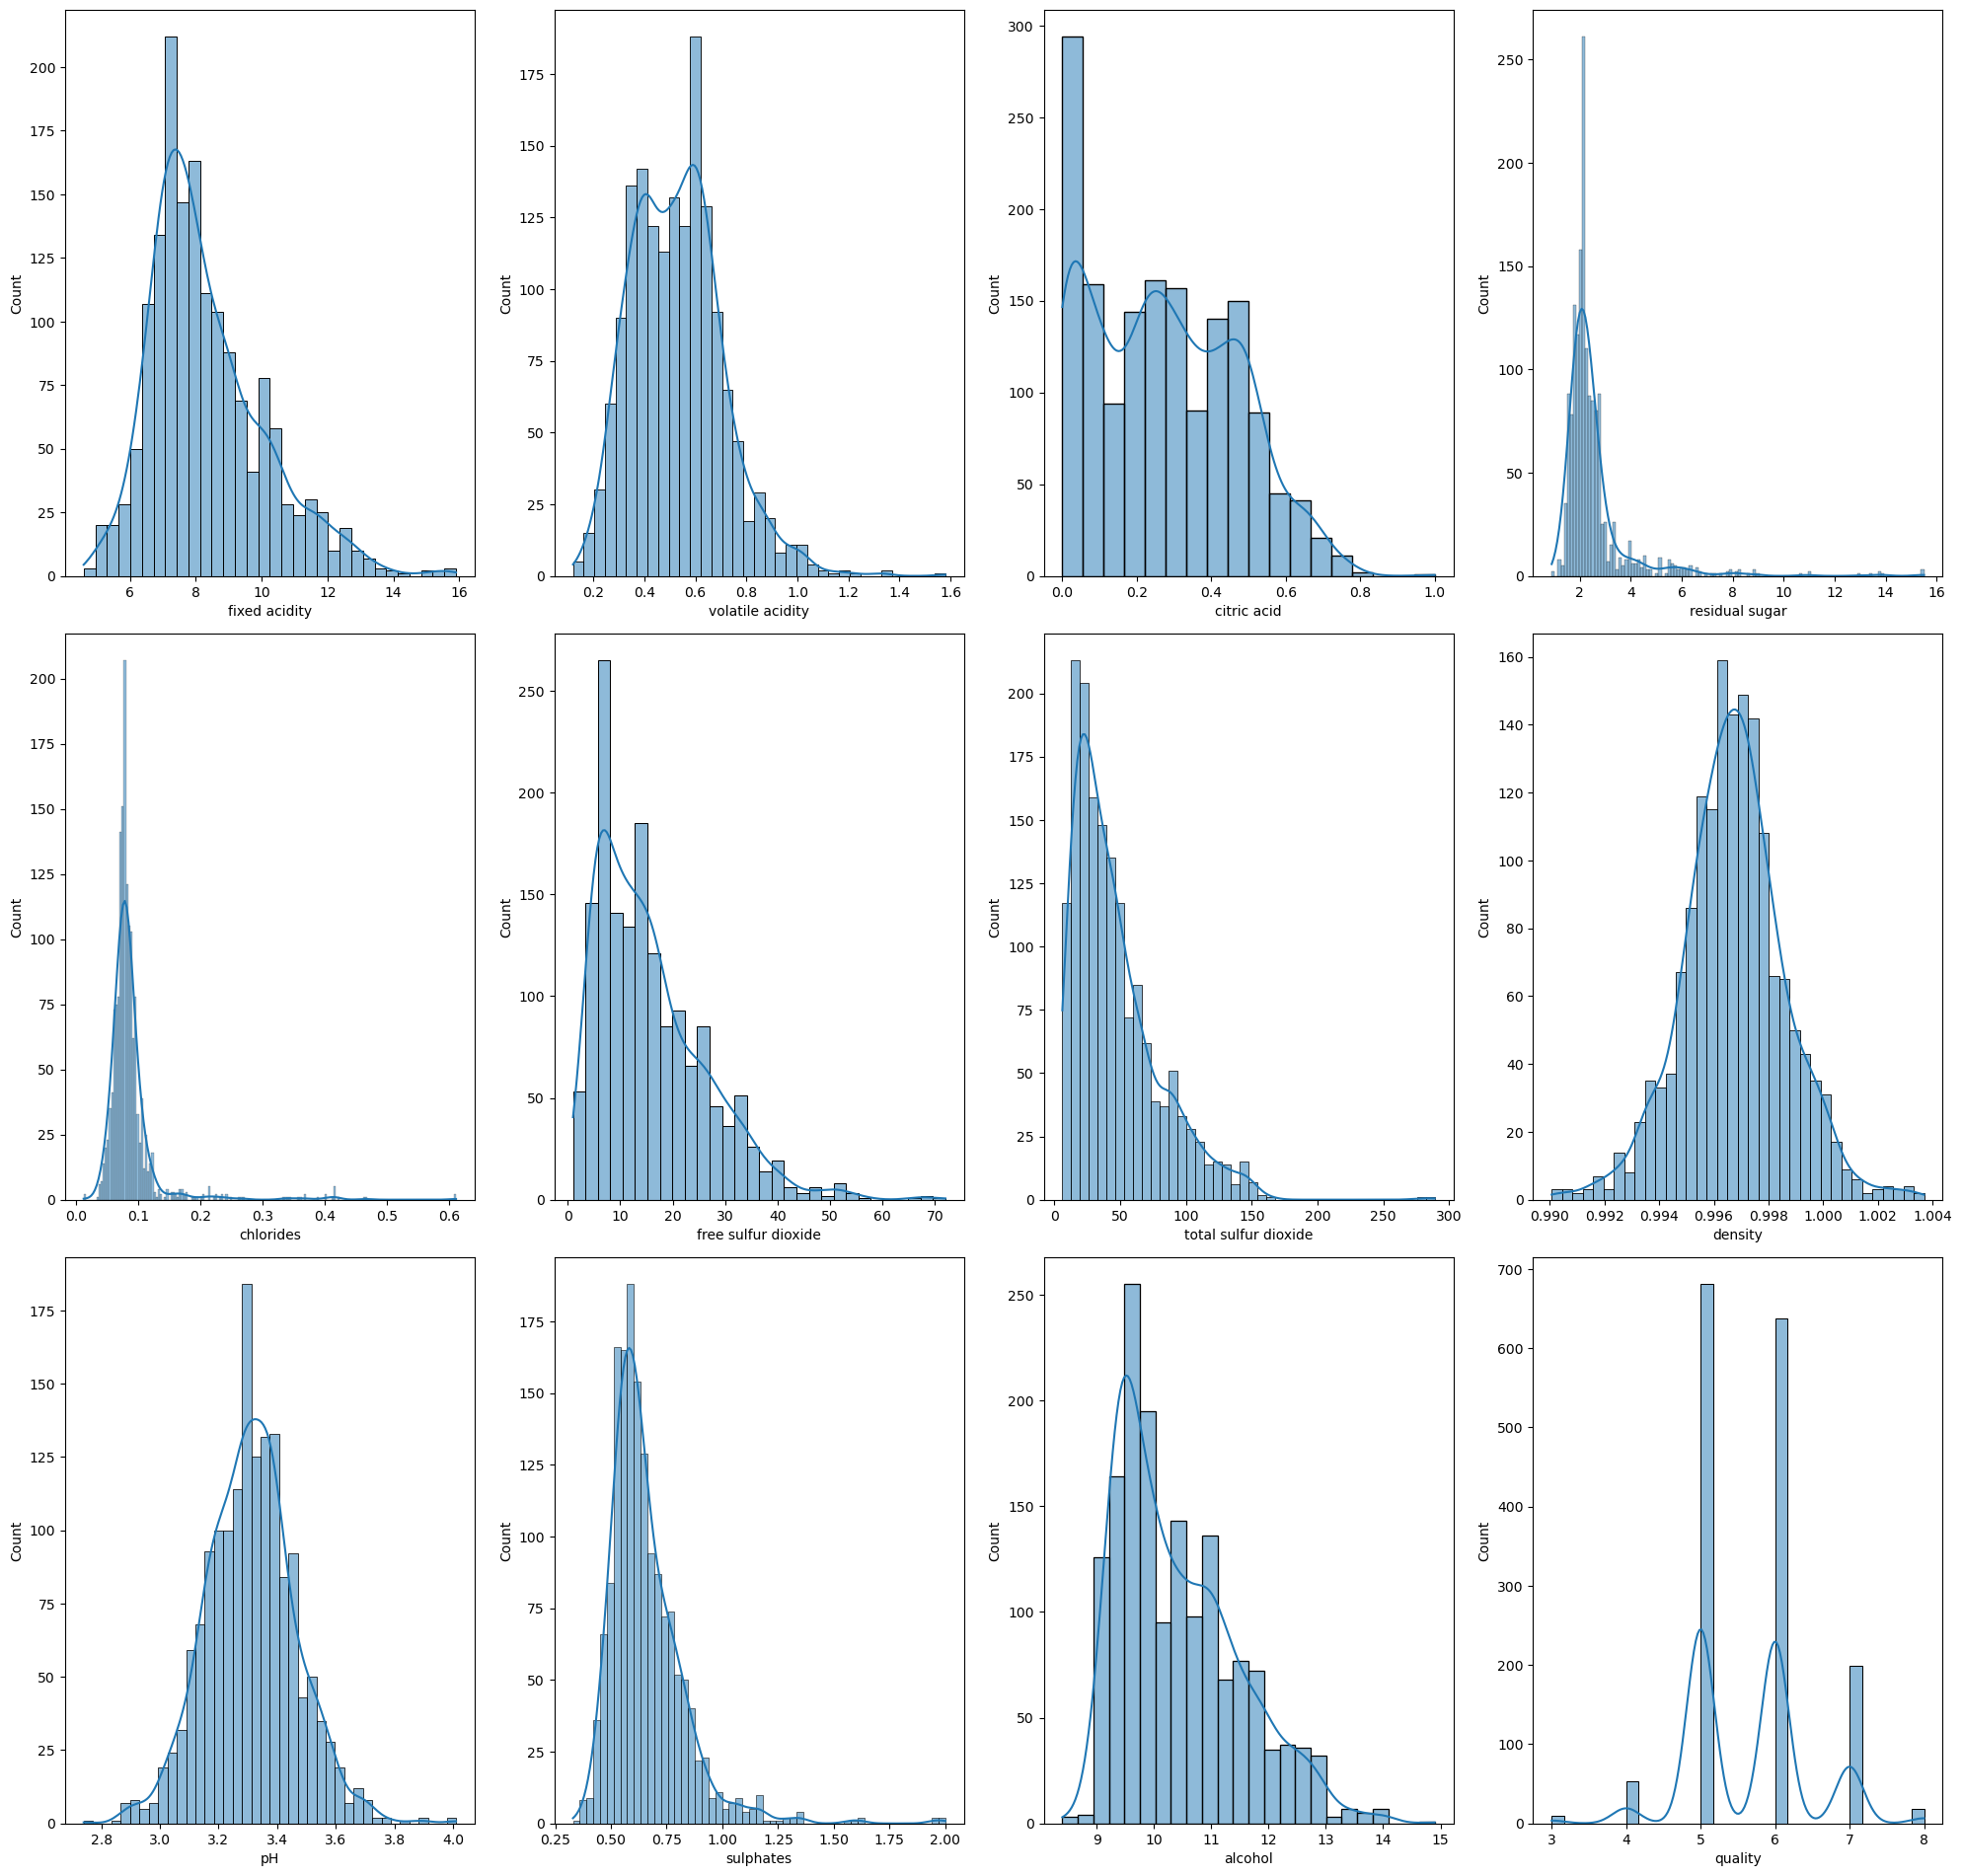

In [15]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(4, 4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

we observe that most of the data is distributed normally with right skewness

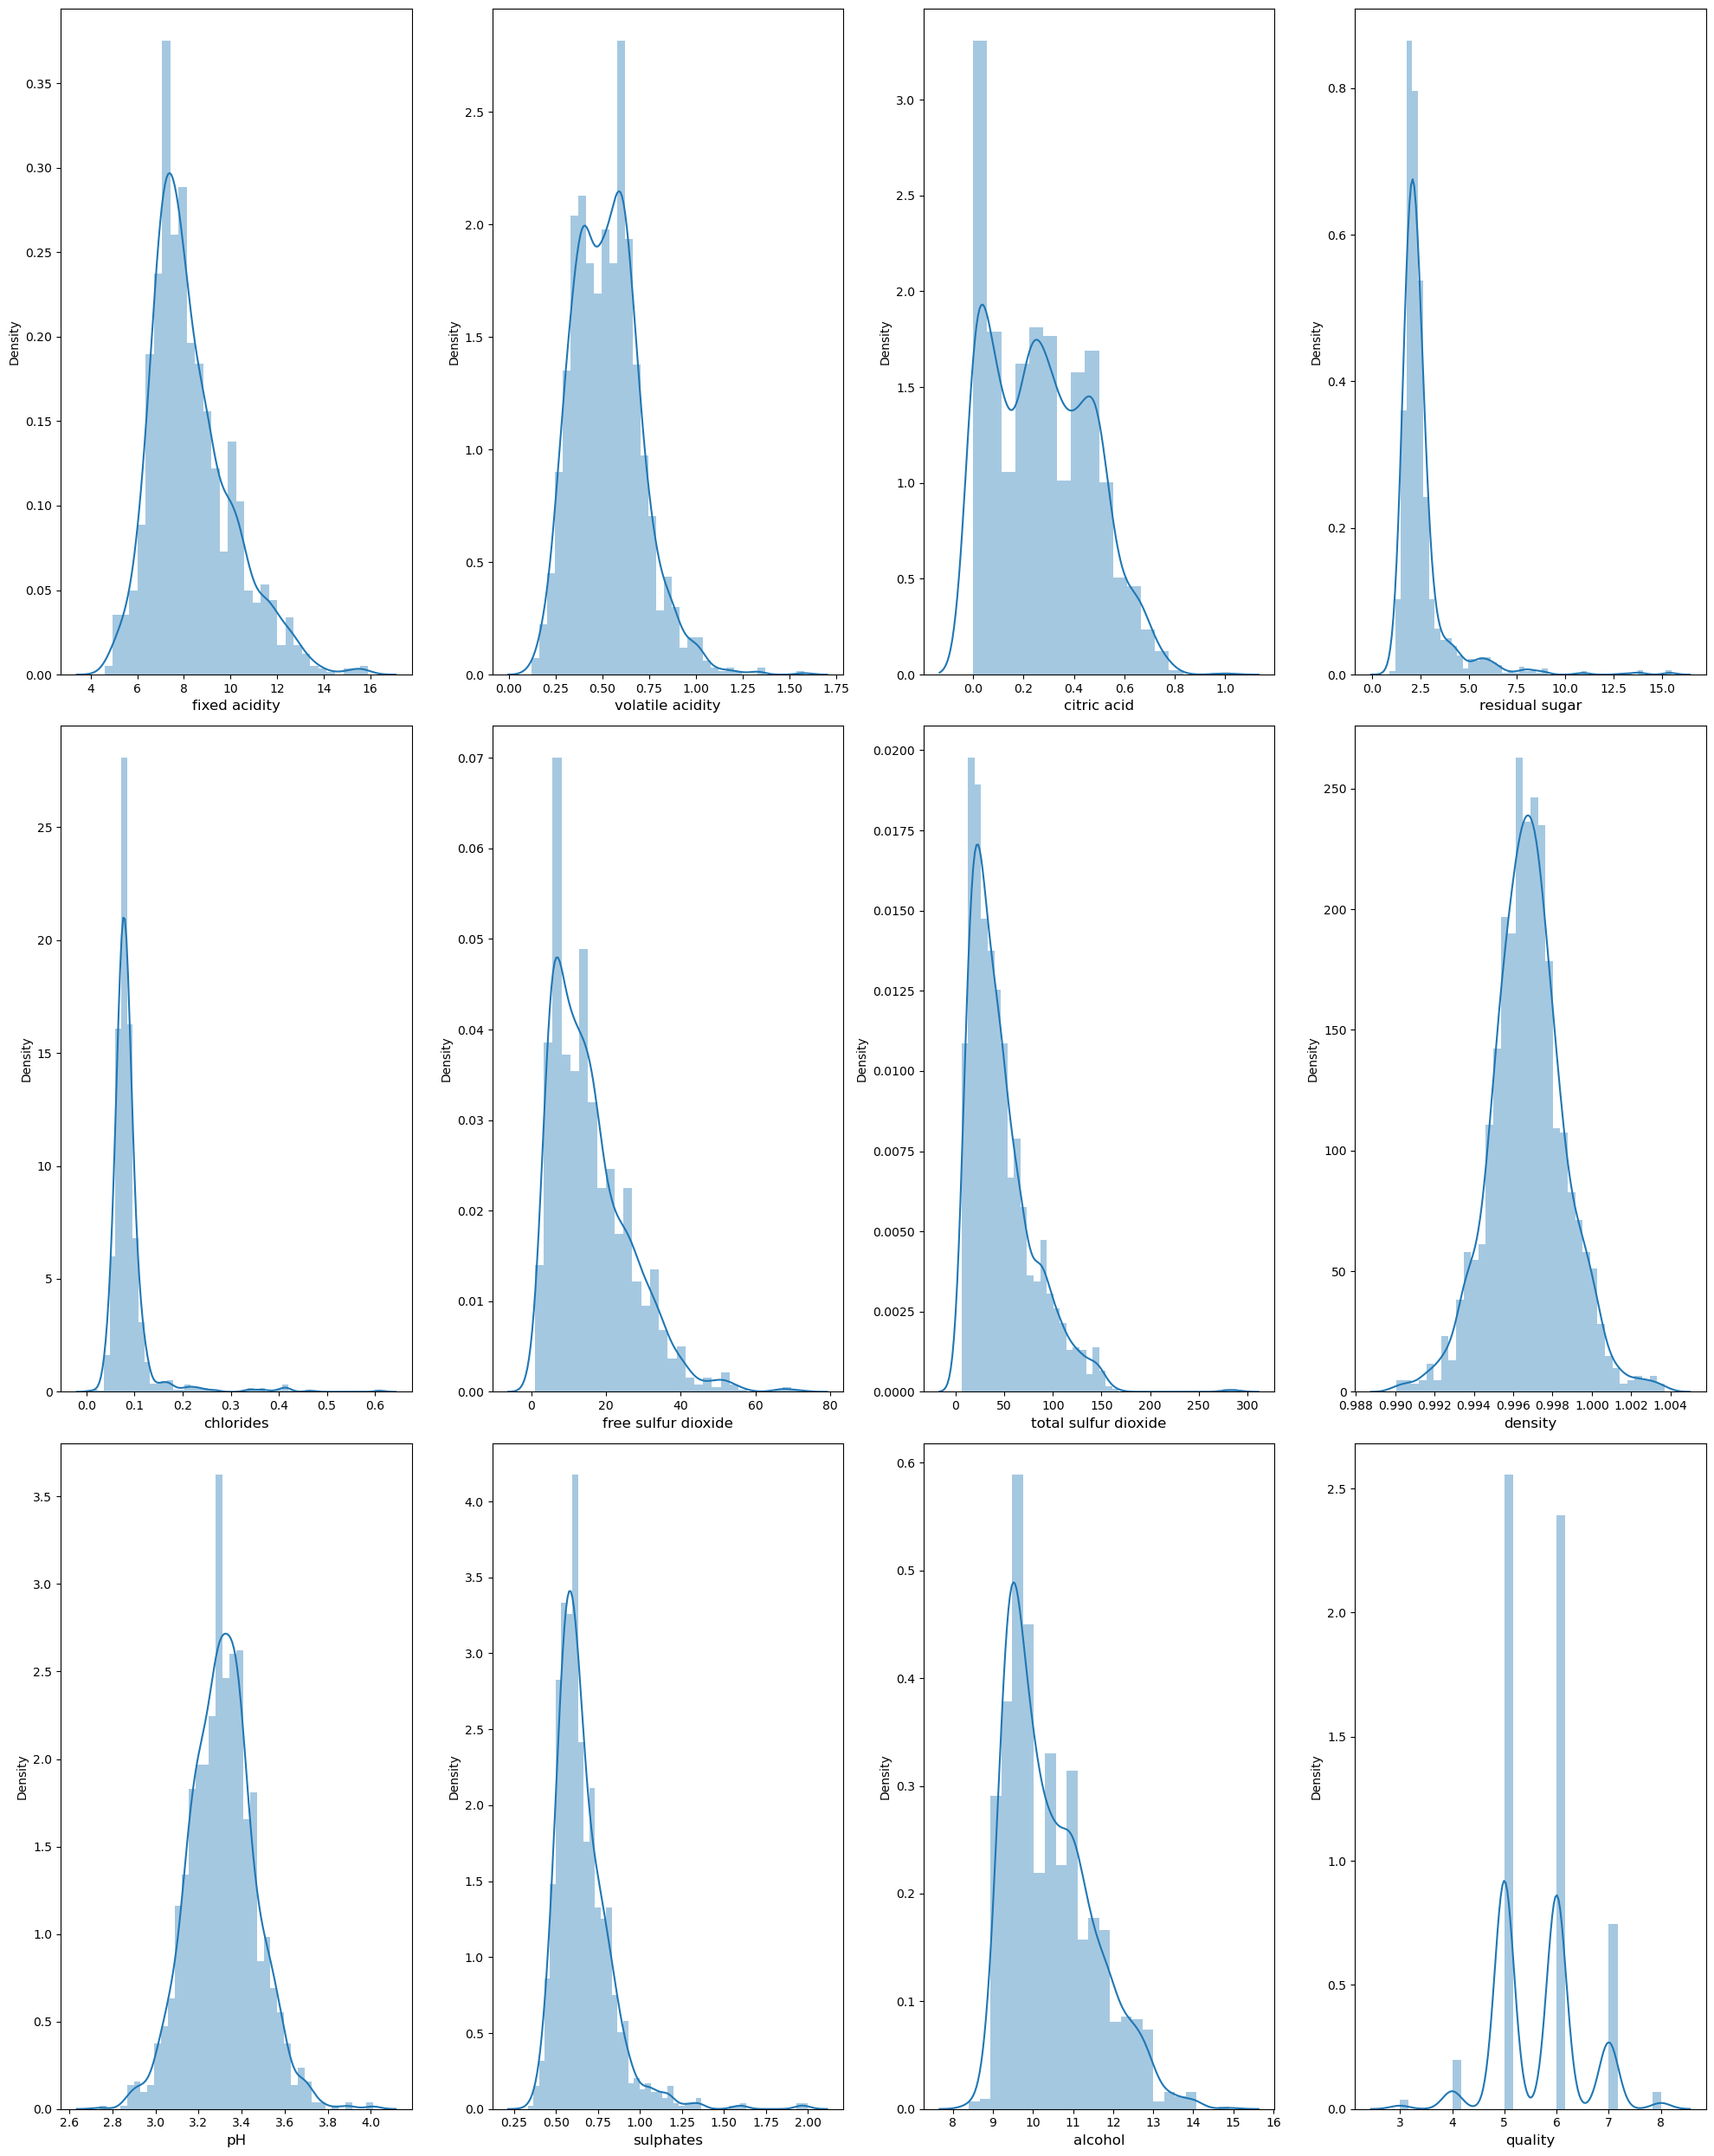

In [16]:
plt.figure(figsize=(20,25),facecolor="white")
pltno=1
for col in df:
    if pltno<=12:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
#         plt.yticks(rotation=0,fontsize=10)
    pltno+=1
plt.tight_layout()


# 20,25 is dimensions of the plotsize  and 3,4 means in represntation we need 3 rows and 4 col

In [17]:
#sns.pairplot(data=df)

feature grouping of the target variable 

In [18]:
df['good-quality'] = [1 if i >= 7 else 0 for i in df['quality']]
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good-quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


In [19]:
df.shape

(1599, 13)

In [20]:
df.loc[df['good-quality'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good-quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1


# Finding OUTLIERS

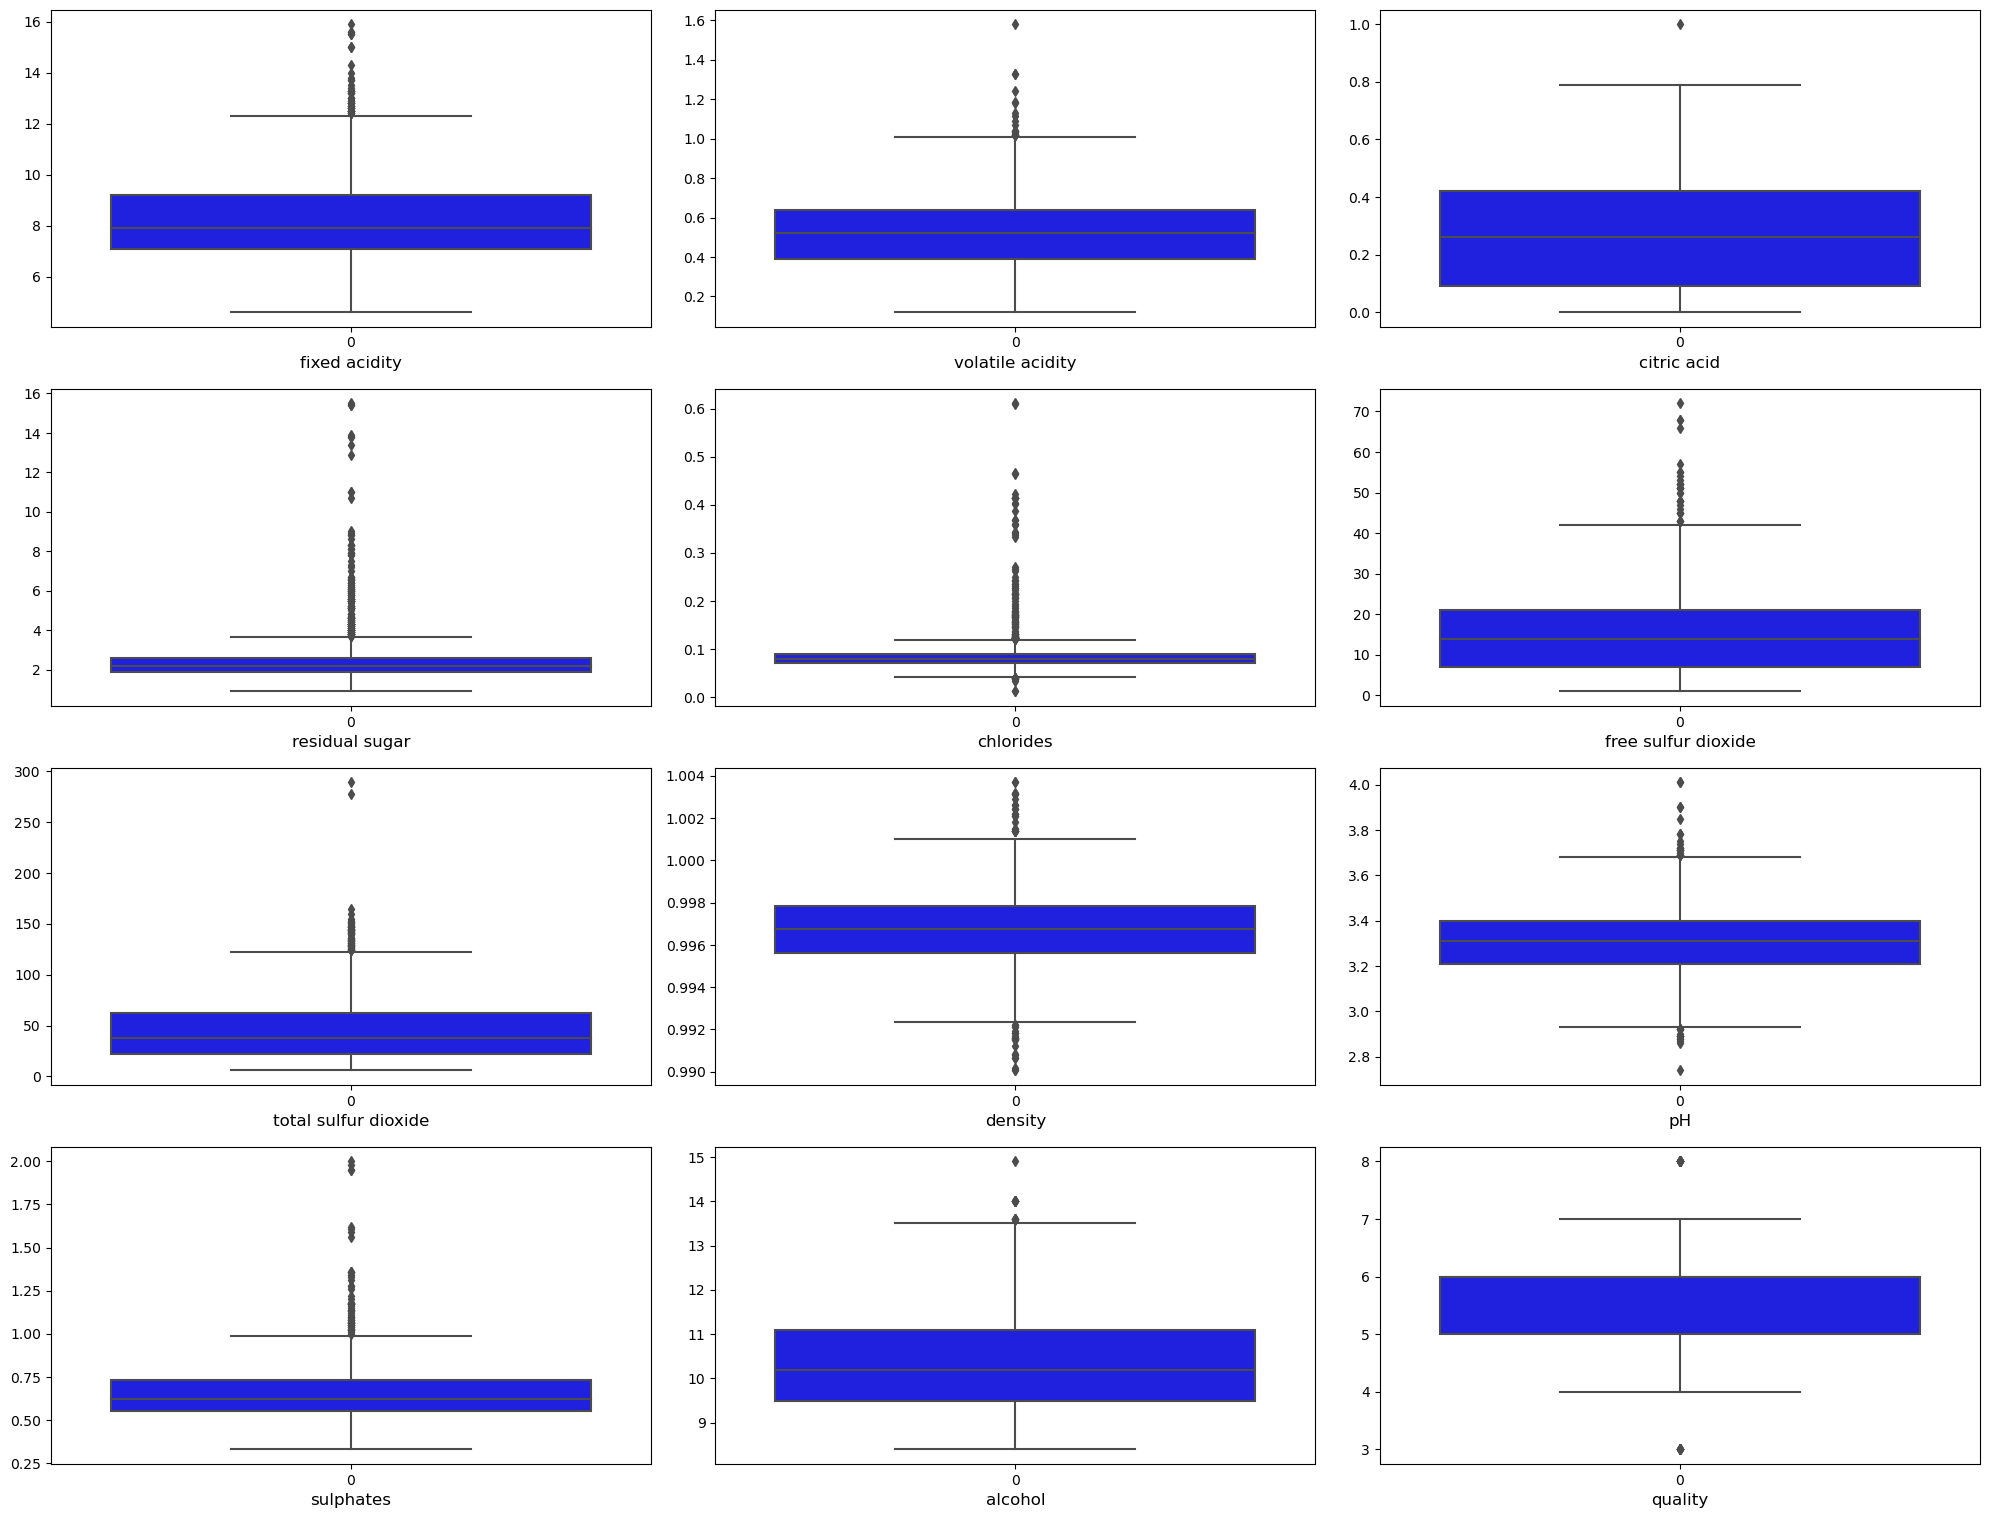

In [21]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

using z^2

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good-quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823,0.396256


In [23]:
np.where(z>3.5)

(array([  13,   17,   17,   19,   33,   42,   45,   81,   81,   83,   86,
          91,   92,  106,  106,  126,  127,  151,  151,  151,  151,  169,
         169,  181,  226,  226,  240,  243,  244,  258,  258,  281,  291,
         324,  325,  339,  354,  396,  396,  400,  400,  442,  451,  480,
         494,  554,  555,  557,  584,  595,  614,  639,  649,  652,  652,
         652,  672,  690,  692,  695,  723,  730,  754,  911,  917,  923,
         925, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1131, 1165, 1186, 1235, 1244, 1244, 1260, 1299, 1312, 1316,
        1319, 1319, 1321, 1370, 1372, 1374, 1434, 1434, 1434, 1435, 1435,
        1435, 1474, 1476, 1558, 1574, 1589], dtype=int64),
 array([ 9,  4,  9,  4,  3,  4,  8,  4,  9,  4,  9,  9,  9,  4,  9,  1,  1,
         2,  4,  8,  9,  4,  9,  4,  4,  9,  4,  0,  0,  4,  9,  4,  4,  3,
         3,  9,  6,  3,  5,  3,  5,  0,  4,  3,  3,  0,  0,  0,  5,  3,  9,
         9,  3,  0,  3, 10,  1,  1,  4,  8,  9,

In [24]:
df.shape

(1599, 13)

In [25]:
df2=df[(z<4).all(axis=1)]

In [26]:
df2.shape

(1537, 13)

In [27]:
df2.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [28]:
print("data loss ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

data loss  3.877423389618512


In [29]:

q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df3=df[~((df<(q1-3.5*iqr)) | (df>(q3+3.5*iqr))).any(axis=1)]

In [30]:
df3.shape

(1258, 13)

In [31]:
df=df2

In [32]:
feat=df[['residual sugar','chlorides','total sulfur dioxide','sulphates']]
z=np.abs(zscore(feat))
z

,residual sugar,chlorides,total sulfur dioxide,sulphates
0,0.548723,0.258869,0.366903,0.629182
1,0.180896,0.619546,0.686694,0.249025
2,0.131798,0.379978,0.271641,0.029474
3,0.548723,0.298797,0.463204,0.482814
4,0.548723,0.258869,0.366903,0.629182
...,...,...,...,...
1594,0.444492,0.300122,0.047631,0.482814
1595,0.236029,0.817861,0.175859,0.834497
1596,0.131798,0.258869,0.175340,0.761313
1597,0.444492,0.298797,0.047631,0.468577


In [33]:
np.where(z>3)

(array([   9,   11,   13,   13,   14,   14,   31,   34,   35,   36,   38,
          74,   80,   82,   98,  109,  132,  134,  140,  141,  142,  143,
         147,  149,  150,  166,  173,  174,  186,  200,  204,  224,  224,
         257,  261,  262,  265,  284,  288,  289,  318,  332,  342,  344,
         346,  347,  354,  355,  356,  384,  389,  391,  391,  451,  456,
         473,  474,  487,  487,  487,  489,  495,  510,  513,  521,  535,
         536,  537,  560,  564,  592,  593,  604,  605,  612,  617,  631,
         637,  649,  669,  732,  733,  737,  738,  741,  756,  769,  813,
         843,  850,  864,  865,  876,  932,  996, 1027, 1030, 1033, 1034,
        1048, 1050, 1052, 1063, 1087, 1100, 1101, 1112, 1129, 1139, 1144,
        1146, 1156, 1226, 1238, 1239, 1280, 1304, 1304, 1313, 1318, 1332,
        1344, 1345, 1347, 1378, 1418, 1433, 1436, 1509, 1527], dtype=int64),
 array([0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 3, 3, 3, 2, 2, 1, 2, 1, 0, 0, 0, 0,
        3, 0, 0, 1, 2, 2, 2, 0, 2, 

In [34]:
df3=df[(z<3).all(axis=1)]

In [35]:
df3.shape

(1414, 13)

In [36]:
df.shape

(1537, 13)

In [37]:
df['good-quality'].value_counts()

0    1326
1     211
Name: good-quality, dtype: int64

# correlation matrix 

In [38]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good-quality
fixed acidity,1.000000,-0.276854,0.694992,0.145177,0.156224,-0.153435,-0.107979,0.667833,-0.702413,0.210457,-0.072929,0.133260,0.119084
volatile acidity,-0.276854,1.000000,-0.566741,0.074296,0.117307,0.000273,0.108983,0.029748,0.237415,-0.322255,-0.217113,-0.389619,-0.274444
citric acid,0.694992,-0.566741,1.000000,0.150968,0.091602,-0.075496,0.012648,0.369562,-0.524540,0.302830,0.132680,0.239041,0.216937
residual sugar,0.145177,0.074296,0.150968,1.000000,0.103839,0.055396,0.133257,0.353109,-0.066616,0.063070,0.092580,0.009398,0.080437
chlorides,0.156224,0.117307,0.091602,0.103839,1.000000,-0.047919,0.054353,0.299642,-0.180310,0.073564,-0.223416,-0.146462,-0.123796
free sulfur dioxide,-0.153435,0.000273,-0.075496,0.055396,-0.047919,1.000000,0.671402,-0.058363,0.092302,0.051691,-0.059021,-0.055757,-0.071628
total sulfur dioxide,-0.107979,0.108983,0.012648,0.133257,0.054353,0.671402,1.000000,0.089059,-0.026439,-0.013848,-0.231712,-0.214517,-0.163924
density,0.667833,0.029748,0.369562,0.353109,0.299642,-0.058363,0.089059,1.000000,-0.329001,0.155174,-0.505312,-0.181234,-0.154853
pH,-0.702413,0.237415,-0.524540,-0.066616,-0.180310,0.092302,-0.026439,-0.329001,1.000000,-0.057070,0.191815,-0.071483,-0.061761
sulphates,0.210457,-0.322255,0.302830,0.063070,0.073564,0.051691,-0.013848,0.155174,-0.057070,1.000000,0.205511,0.348849,0.277819


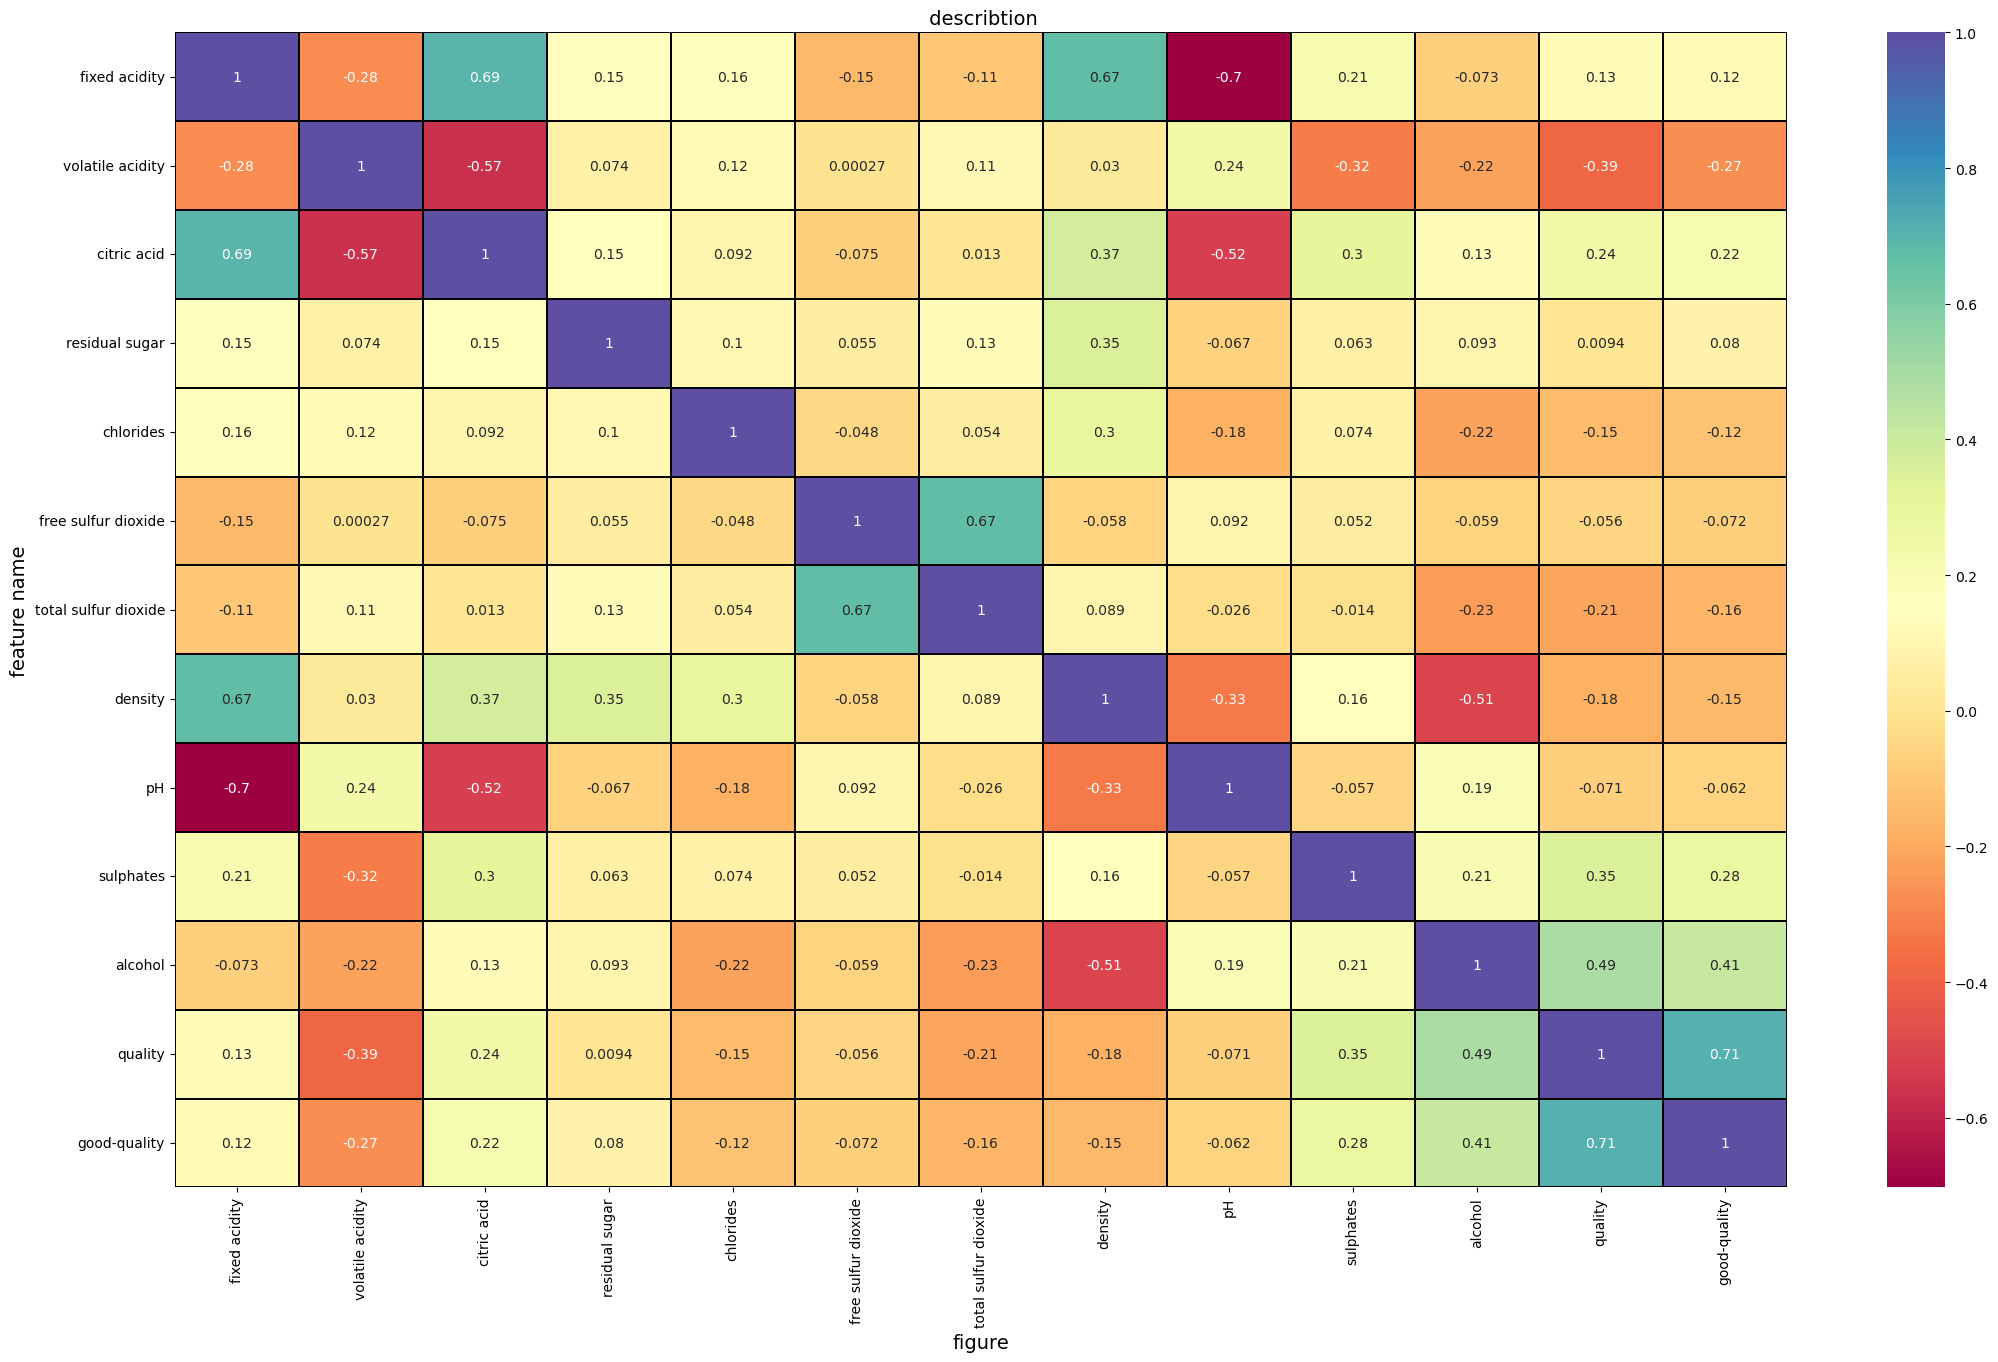

In [39]:
# visulalize corr using heatmap
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.2,fmt='.2g',linecolor="black",annot=True,cmap="Spectral")
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()


In [40]:
df.corr()['good-quality'].sort_values()


volatile acidity       -0.274444
total sulfur dioxide   -0.163924
density                -0.154853
chlorides              -0.123796
free sulfur dioxide    -0.071628
pH                     -0.061761
residual sugar          0.080437
fixed acidity           0.119084
citric acid             0.216937
sulphates               0.277819
alcohol                 0.412469
quality                 0.713009
good-quality            1.000000
Name: good-quality, dtype: float64

In [41]:
# there is positive and negative correlation of the target with the other feature


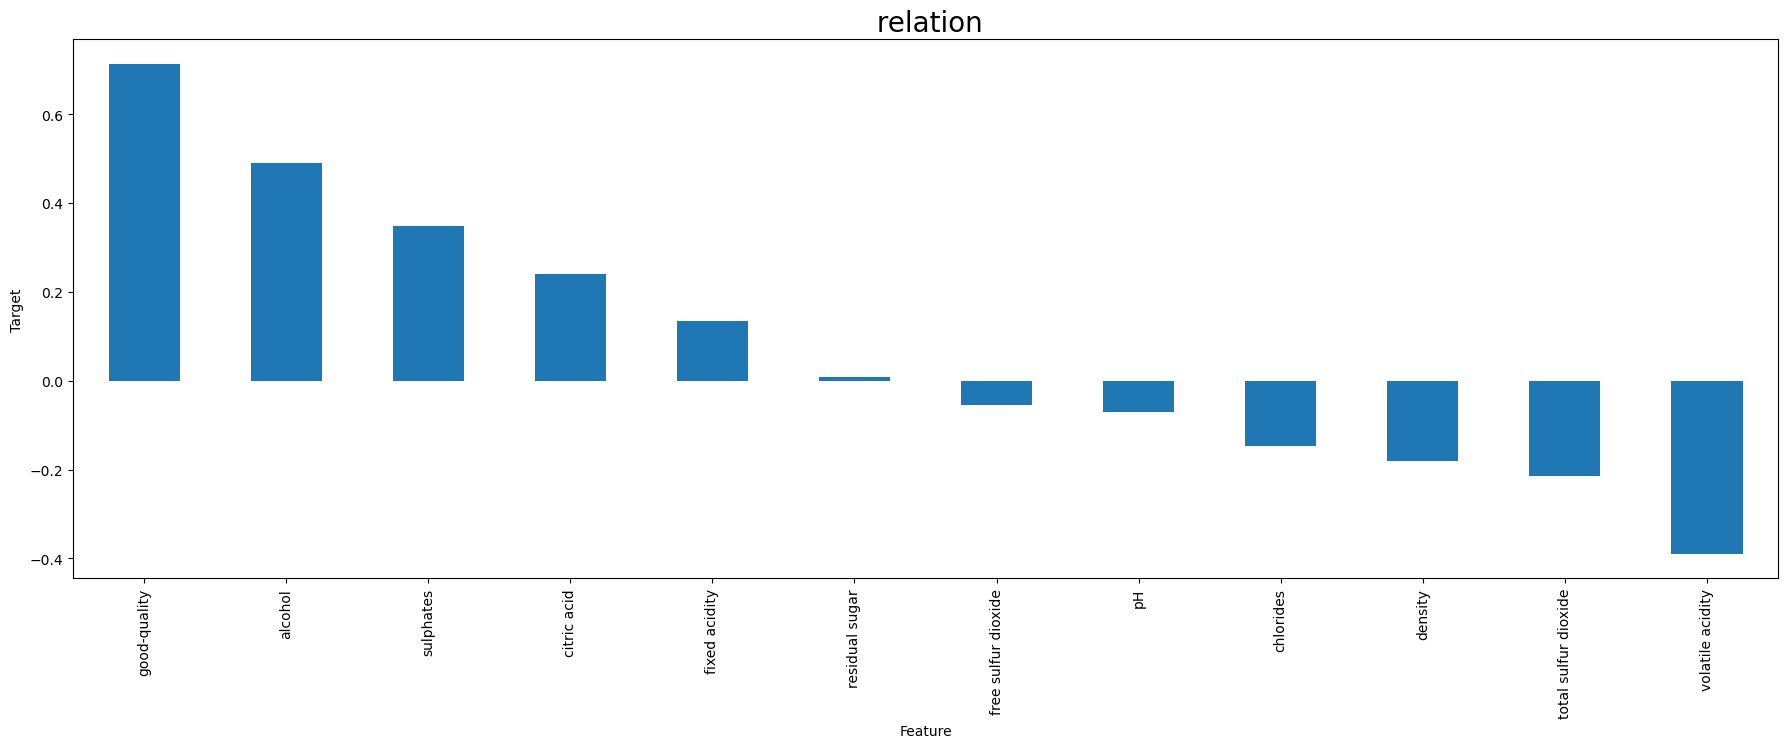

In [42]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

In [43]:
df.skew()

fixed acidity           0.869200
volatile acidity        0.498292
citric acid             0.295350
residual sugar          2.632592
chlorides               2.958214
free sulfur dioxide     1.031749
total sulfur dioxide    1.201576
density                -0.094050
pH                      0.216549
sulphates               1.017808
alcohol                 0.834592
quality                 0.230349
good-quality            2.110017
dtype: float64

# feature scaling 

In [51]:
# we observe values are varrying ..so standardize it so modelling can be easy

In [45]:
df=df.drop('quality',axis=1)

In [47]:
x=df.drop(['good-quality'],axis=1)
y=df['good-quality']

In [48]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [49]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good-quality, Length: 1537, dtype: int64

In [50]:
print("feature dimension",x.shape)
print("label dimension",y.shape)

feature dimension (1537, 11)
label dimension (1537,)


In [52]:
# scaler method is not applied on the target variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528900,0.984482,-1.388852,-0.548723,-0.258869,-0.462257,-0.366903,0.601501,1.312605,-0.629182,-0.977099
1,-0.294003,2.010249,-1.388852,0.180896,0.619546,0.936541,0.686694,0.055180,-0.794169,0.249025,-0.599584
2,-0.294003,1.326404,-1.179591,-0.131798,0.379978,-0.062601,0.271641,0.164444,-0.386406,0.029474,-0.599584
3,1.702622,-1.408974,1.540793,-0.548723,-0.298797,0.137228,0.463204,0.710766,-1.066011,-0.482814,-0.599584
4,-0.528900,0.984482,-1.388852,-0.548723,-0.258869,-0.462257,-0.366903,0.601501,1.312605,-0.629182,-0.977099
...,...,...,...,...,...,...,...,...,...,...,...
1532,-1.233592,0.414611,-0.970331,-0.444492,0.300122,1.635940,-0.047631,-0.982832,0.904842,-0.482814,0.061067
1533,-1.409764,0.129676,-0.865701,-0.236029,-0.817861,2.335340,0.175859,-0.862641,1.380565,0.834497,0.721717
1534,-1.174867,-0.098272,-0.708755,-0.131798,-0.258869,1.336198,-0.175340,-0.523922,0.700961,0.761313,0.532960
1535,-1.409764,0.671053,-0.761071,-0.444492,-0.298797,1.635940,-0.047631,-0.671428,1.720368,0.468577,-0.222069


# VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,7.942349,fixed acidity
1,1.848565,volatile acidity
2,3.145768,citric acid
3,1.648278,residual sugar
4,1.174188,chlorides
5,1.999873,free sulfur dioxide
6,2.249514,total sulfur dioxide
7,6.699057,density
8,3.262614,pH
9,1.302090,sulphates


In [54]:
x.drop('fixed acidity',axis=1,inplace=True)

In [55]:
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,1.843959,volatile acidity
1,2.799832,citric acid
2,1.391629,residual sugar
3,1.150275,chlorides
4,1.972717,free sulfur dioxide
5,2.129683,total sulfur dioxide
6,2.695067,density
7,1.559157,pH
8,1.288862,sulphates
9,2.324573,alcohol


In [56]:
y.value_counts()

0    1326
1     211
Name: good-quality, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [58]:
y1.value_counts()

0    1326
1    1326
Name: good-quality, dtype: int64

# Machine learning 

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [60]:
maxAcc=0
maxRs=0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state = i)
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("best accuracy is ",maxAcc," at random state ",maxRs)

best accuracy is  0.9597989949748744  at random state  1


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = maxRs)

In [88]:
x_train.shape

(1075, 10)

In [87]:
y_train.shape

(1075,)

In [89]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'gb': GradientBoostingClassifier()}


In [90]:
for key, value in model.items():
    value.fit(x_train, y_train)
    
    if key == 'rf':
        print('RFC Feature Importances:', value.feature_importances_)
        print()
    
    elif key == 'dt':
        print('DT: Decision Trees do not have intercept or coefficients.')
        print()
    elif key == 'lgR':
        print('Logistic:', value.intercept_)
        print('Logistic coef:' ,  value.coef_)
        
    elif key == 'svm':
        print('svm intercept:', value.intercept_)
        print('svm coef:' ,  value.coef_)

    elif key == 'knn':
        print('KNN: k-Nearest Neighbors do not have intercept or coefficients.')
        print()

    elif key == 'gb':
         print('gradiant boosting do not have intercept or coefficients.')


DT: Decision Trees do not have intercept or coefficients.

RFC Feature Importances: [0.11104539 0.08884728 0.0812659  0.07910406 0.06350203 0.08086006
 0.10933693 0.07045843 0.13433186 0.18124807]

Logistic: [-2.91484754]
Logistic coef: [[-0.56471512 -0.15684773  0.3124487  -0.35670922  0.1023295  -0.64669445
  -0.18763021 -0.32390049  0.60609676  0.8920836 ]]
svm intercept: [-1.00029286]
svm coef: [[-1.94987002e-04 -1.40937853e-04  1.48338479e-04 -1.02057981e-04
   8.31873297e-05 -2.44470397e-04 -9.83661609e-05 -1.05671578e-04
   1.47904069e-04  2.38735441e-04]]
KNN: k-Nearest Neighbors do not have intercept or coefficients.

gradiant boosting do not have intercept or coefficients.


In [91]:

y_preds = {}

for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)

    y_preds[key] = y_pred
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
value.score(x_train,y_train)

0.9627906976744186

In [68]:
value.score(x_test,y_test)

0.8831168831168831

In [92]:
# model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression()}
mae = {}
mse = {}
r2 = {}
rmse={}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value)    

print("\nR-squared:",r2)
print("\nRoot Mean Squared Error:",rmse)
print("\nAccuracy ",acu)

best_model = max(acu, key=acu.get) and min(rmse, key=rmse.get)
print("\nBest Model:", best_model)




R-squared: {'dt': 0.06294944130987934, 'rf': 0.19924770439207873, 'lgR': 0.011837592654054596, 'nb': -0.12446067042814479, 'svm': -0.17557251908396965, 'knn': -0.10742338754286984, 'gb': 0.07998672419515429}

Root Mean Squared Error: {'dt': 0.3450327796711771, 'rf': 0.31895391788094046, 'lgR': 0.3543178312491844, 'nb': 0.3779644730092272, 'svm': 0.386459117308221, 'knn': 0.3750901767477265, 'gb': 0.34188172937891387}

Accuracy  {'dt': 0.8809523809523809, 'rf': 0.8982683982683982, 'lgR': 0.8744588744588745, 'nb': 0.8571428571428571, 'svm': 0.8506493506493507, 'knn': 0.8593073593073594, 'gb': 0.8831168831168831}

Best Model: rf


ROC 

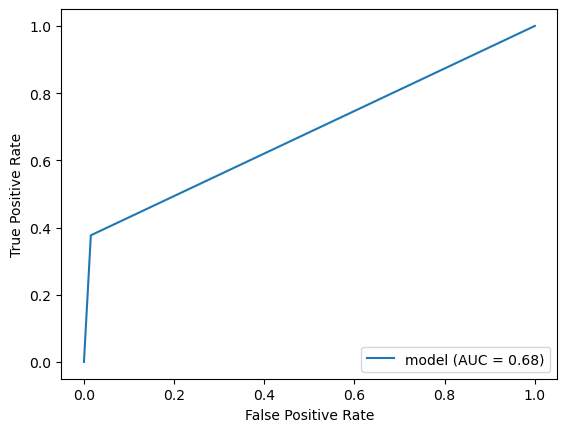

In [71]:

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="model")
roc_display.plot()


In [3]:
model = RandomForestClassifier(max_depth=15, min_samples_split=2, random_state=1)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("r2 score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print(f"Accuracy: {acc*100:.2f}%")



NameError: name 'RandomForestClassifier' is not defined

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       393
           1       0.73      0.35      0.47        69

    accuracy                           0.88       462
   macro avg       0.81      0.66      0.70       462
weighted avg       0.87      0.88      0.87       462



In [82]:
print(confusion_matrix(y_test,y_pred))

[[384   9]
 [ 45  24]]


In [72]:
print(len(y_test))
print(len(pred))

462
462


# SAVE model

In [74]:
import joblib
import pickle
filename="winequality.pkl"
pickle.dump(model,open(filename,'wb'))

In [75]:
lod_model=pickle.load(open('winequality.pkl','rb'))
res=lod_model.score(x_test,y_test)
print(res*100)

89.39393939393939


In [76]:
prediction=model.predict(x_test) # use model 
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# user prediction

In [78]:
prediction=df.iloc[2]
print(prediction)

fixed acidity            7.800
volatile acidity         0.760
citric acid              0.040
residual sugar           2.300
chlorides                0.092
free sulfur dioxide     15.000
total sulfur dioxide    54.000
density                  0.997
pH                       3.260
sulphates                0.650
alcohol                  9.800
good-quality             0.000
Name: 2, dtype: float64


In [106]:
sample=pd.read_csv('wine.csv')
sample.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [ ]:
val=(18,0,33.770,1,1,0)
input=np.asarray(val)
inp=input.reshape(1,-1)
print(inp)